In [21]:
# load necessary Python packages
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [22]:
df = pd.read_csv('cheaters.csv')
df.head(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,cheater
0,3,32.0,9.0,3.0,3,17,2,1
1,3,27.0,13.0,3.0,1,14,3,1
2,4,22.0,2.5,0.0,1,16,3,1
3,4,37.0,16.5,4.0,3,16,5,1
4,5,27.0,9.0,1.0,1,14,3,1


In [23]:
(df['cheater'] == 1).sum()

2053

In [24]:
((df['cheater'] == 1).sum())/len(df)

0.3224945020420987

(array([ 139., 1800.,    0., 1931.,    0., 1069.,    0.,  634.,    0.,
         793.]),
 array([17.5 , 19.95, 22.4 , 24.85, 27.3 , 29.75, 32.2 , 34.65, 37.1 ,
        39.55, 42.  ]),
 <BarContainer object of 10 artists>)

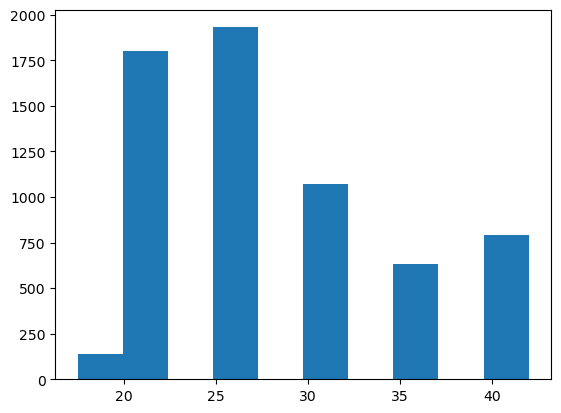

In [25]:
import matplotlib.pyplot as plt
plt.hist(df['age'])

([<matplotlib.patches.Wedge at 0x27c3aff4910>,
 [Text(0.21573065483347167, 1.0786381620196468, '3'),
  Text(-0.9598715998166991, -0.5372583288003367, '4'),
  Text(0.29177327175431955, -1.060598113278437, '2'),
  Text(0.9582765635212207, -0.5400981649718504, '5'),
  Text(1.0951171387049898, -0.10352995950253413, '6'),
  Text(1.0997748445689648, -0.022255139930130067, '1')])

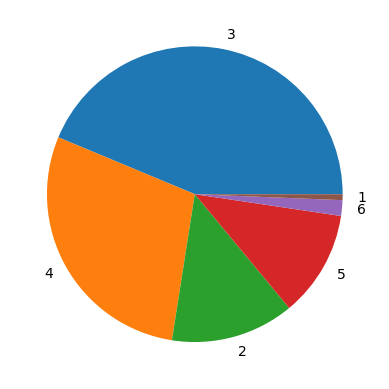

In [26]:
plt.pie(df['occupation'].value_counts(), labels= (df['occupation'].value_counts()).index)

In [27]:
dummy = pd.get_dummies(df['occupation'], prefix='occupation')
dummy = dummy.drop('occupation_3', axis=1)
df = pd.concat([df, dummy], axis=1)
df.head(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,cheater,occupation_1,occupation_2,occupation_4,occupation_5,occupation_6
0,3,32.0,9.0,3.0,3,17,2,1,0,1,0,0,0
1,3,27.0,13.0,3.0,1,14,3,1,0,0,0,0,0
2,4,22.0,2.5,0.0,1,16,3,1,0,0,0,0,0
3,4,37.0,16.5,4.0,3,16,5,1,0,0,0,1,0
4,5,27.0,9.0,1.0,1,14,3,1,0,0,0,0,0


In [28]:
from sklearn.utils import resample
df = pd.concat([df[df['cheater'] == 1], resample(df[df['cheater'] == 0], replace=False, n_samples=2053, random_state=4321)])
(df['cheater'] == 0).sum()

2053

In [29]:
x = df.drop('cheater', axis=1)
y = df['cheater']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4321)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
clf_lr = LogisticRegression(penalty='none', max_iter=1000, random_state=4321)
clf_lr.fit(x_train, y_train)
y_pred = clf_lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred)
cm_lr = confusion_matrix(y_test, y_pred)
print(accuracy_lr)
print(cm_lr)

0.6815968841285297
[[374 151]
 [176 326]]


In [31]:
# ignore the warning message if any when you run this code cell
import statsmodels.api as sm

clf_logit_model=sm.Logit(y_train,sm.add_constant(x_train))
result=clf_logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.593039
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                cheater   No. Observations:                 3079
Model:                          Logit   Df Residuals:                     3067
Method:                           MLE   Df Model:                           11
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.1444
Time:                        17:53:16   Log-Likelihood:                -1826.0
converged:                       True   LL-Null:                       -2134.1
Covariance Type:            nonrobust   LLR p-value:                4.567e-125
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.8302        nan        nan        nan         nan         nan
rate_marriage    -0.

In [ ]:
yrs_married

In [32]:
# This gives the probability of the target being 1:
y_predict_prob = result.predict(sm.add_constant(x_test))

# Set y_predict at 1 if and only if the above probability is higher than 0.5:
y_predict = y_predict_prob.apply(lambda x : 1 if x>0.5 else 0)

In [33]:
print(f"The accuracy is: {accuracy_score(y_test, y_predict).round(4)}")
print("The confusion matrix is:")
cm = confusion_matrix(y_test, y_predict)
print(cm)

The accuracy is: 0.6816
The confusion matrix is:
[[374 151]
 [176 326]]


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
X = df.drop('cheater', axis=1)
y = df['cheater']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4321)
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
cm_knn = confusion_matrix(y_test, y_pred)
print(accuracy_knn)
print(cm_knn)

0.6553067185978578
[[345 180]
 [174 328]]


C:\Users\abeza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
X = df.drop('cheater', axis=1)
y = df['cheater']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4321)
clf_dt = DecisionTreeClassifier(max_depth=3, random_state=4321)
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred)
cm_dt = confusion_matrix(y_test, y_pred)
print(accuracy_dt)
print(cm_dt)


0.6942551119766309
[[370 155]
 [159 343]]


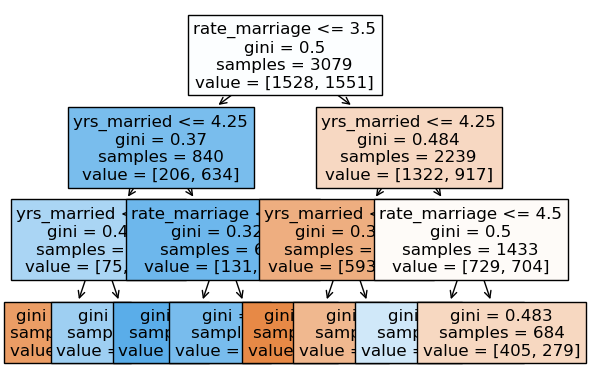

In [36]:
from sklearn import tree
tree.plot_tree(clf_dt,
               feature_names=X_train.columns,
               filled = True,
               fontsize=12)
plt.show()

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
X = df.drop('cheater', axis=1)
y = df['cheater']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4321)
clf_rf = RandomForestClassifier(max_depth=5, random_state=4321)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred)
cm_rf = confusion_matrix(y_test, y_pred)
print(accuracy_rf)
print(cm_rf)


0.6942551119766309
[[366 159]
 [155 347]]


In [38]:
importances = clf_rf.feature_importances_
indices = importances.argsort()[::-1]
for f in range(3):
    print(f"{f+1}. {X.columns[indices[f]]}: {importances[indices[f]]}")

1. rate_marriage: 0.4197156841812028
2. yrs_married: 0.20408624289795627
3. children: 0.1010272333076989


In [39]:
print(accuracy_lr, accuracy_knn, accuracy_dt, accuracy_rf)

0.6815968841285297 0.6553067185978578 0.6942551119766309 0.6942551119766309


In [40]:
from sklearn.metrics import f1_score

y_predict_lr = clf_lr.predict(X_test)
print(f1_score(y_test, y_predict_lr))
y_predict_knn = clf_knn.predict(X_test)
print(f1_score(y_test, y_predict_knn))
y_predict_dt = clf_dt.predict(X_test)
print(f1_score(y_test, y_predict_dt))
y_predict_rf = clf_rf.predict(X_test)
print(f1_score(y_test, y_predict_rf))



0.6659856996935649
0.6495049504950494
0.686
0.6884920634920636


C:\Users\abeza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


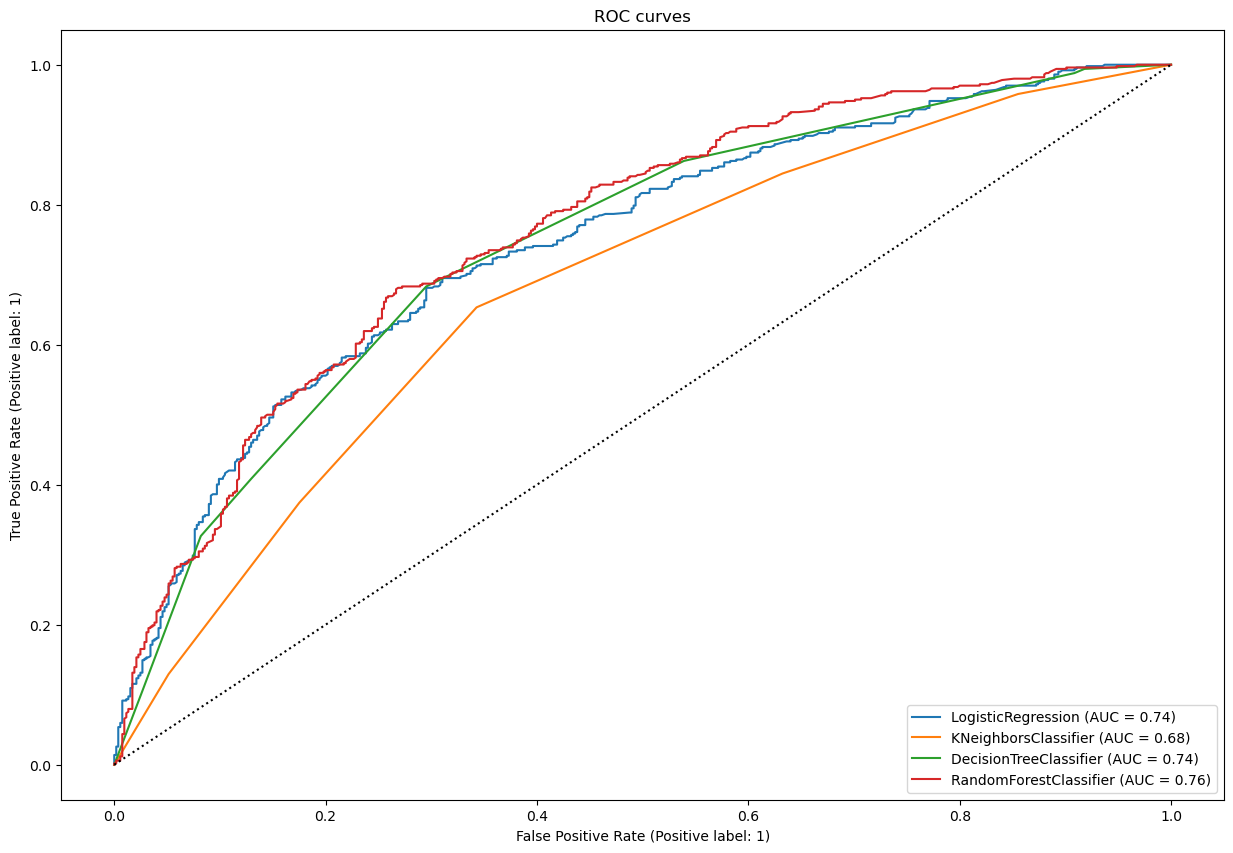

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
fig, ax = plt.subplots(figsize=(15, 10))
RocCurveDisplay.from_estimator(clf_lr, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(clf_knn, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(clf_dt, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(clf_rf, X_test, y_test, ax=ax)
ax.plot([0,1],[0,1], 'k:')
plt.title('ROC curves')
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:,1])

0.7622158983115158